In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model,load_model

In [ ]:
import os

folder_path='/content/drive/MyDrive/divided_datathon_dataset/train/category3_tumor'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]
len(image_files)

524

Without Preprocessed Dataset

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.5,
                                    fill_mode="nearest",
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [ ]:
train_set = train_data_gen.flow_from_directory(directory="/content/drive/MyDrive/divided_datathon_dataset/train",
                                                  target_size=(64,64),
                                                  seed=123,
                                                  batch_size  = 16,)

Found 1938 images belonging to 4 classes.


In [ ]:
valid_data_gen=train_data_gen = ImageDataGenerator(rescale=1./255)

valid_set= valid_data_gen.flow_from_directory(directory="/content/drive/MyDrive/divided_datathon_dataset/val",
                                                  target_size=(64,64),
                                                  seed=123,
                                       batch_size  = 16)

Found 647 images belonging to 4 classes.


In [ ]:
train_set.samples

1938

In [ ]:
c = train_set.class_indices
classes = list(c.keys())

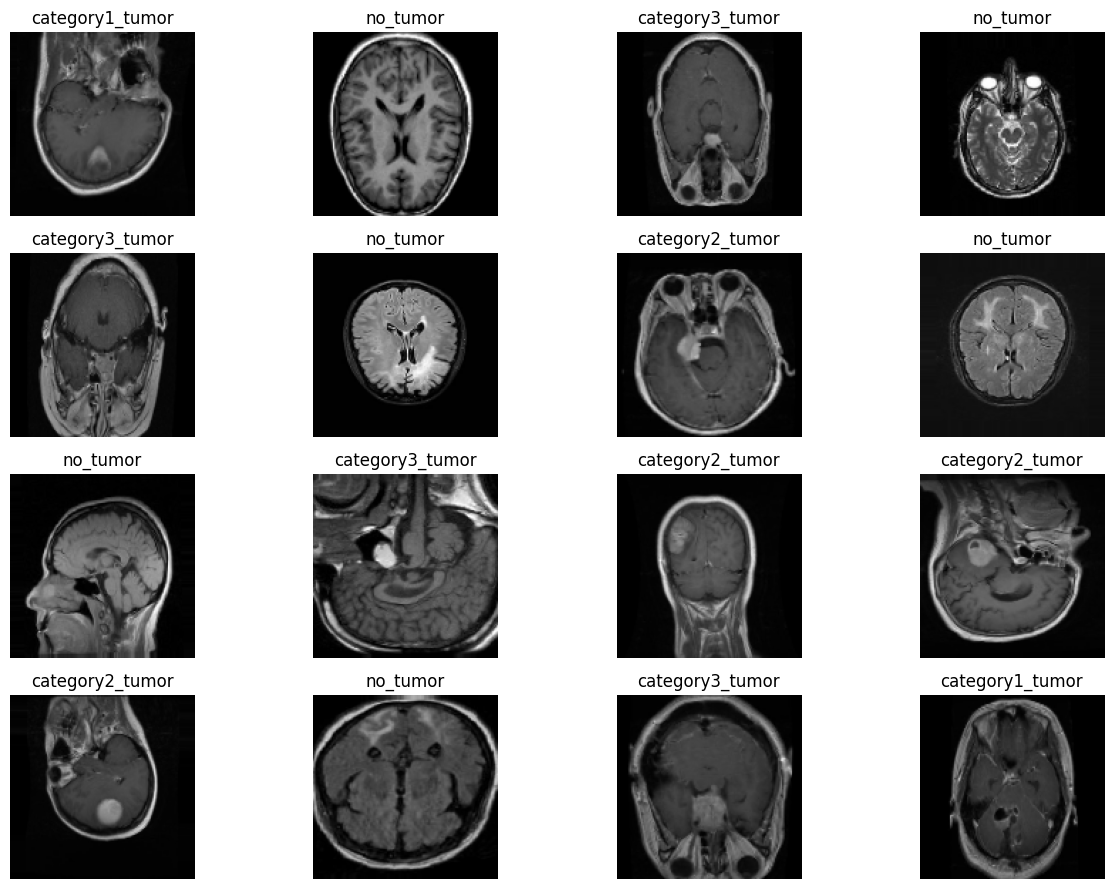

In [ ]:
x,y = next(train_set)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

#Call the plotImages function
plotImages(x,y)

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# IMG_SHAPE = (130,130, 3)
# model=build_model(IMG_SHAPE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
model_history = model.fit(x=train_set,validation_data=valid_set,epochs=30,verbose=1)

Epoch 1/30
122/122 [==============================] - 39s 313ms/step - loss: 1.3475 - accuracy: 0.3344 - val_loss: 1.3116 - val_accuracy: 0.3895
Epoch 2/30
122/122 [==============================] - 11s 88ms/step - loss: 1.3096 - accuracy: 0.3669 - val_loss: 1.2597 - val_accuracy: 0.4637
Epoch 3/30
122/122 [==============================] - 11s 88ms/step - loss: 1.2371 - accuracy: 0.4071 - val_loss: 1.1748 - val_accuracy: 0.4652
Epoch 4/30
122/122 [==============================] - 10s 81ms/step - loss: 1.1426 - accuracy: 0.4799 - val_loss: 1.2362 - val_accuracy: 0.4930
Epoch 5/30
122/122 [==============================] - 11s 87ms/step - loss: 1.1069 - accuracy: 0.5046 - val_loss: 1.3059 - val_accuracy: 0.4111
Epoch 6/30
122/122 [==============================] - 14s 118ms/step - loss: 1.0350 - accuracy: 0.5635 - val_loss: 1.1362 - val_accuracy: 0.4900
Epoch 7/30
122/122 [==============================] - 10s 81ms/step - loss: 1.0189 - accuracy: 0.5433 - val_loss: 1.1364 - val_accurac

In [ ]:
model.save('first_model.h5')

In [ ]:
model = load_model('first_model.h5')

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)  # You can customize this if needed

test_set = test_data_gen.flow_from_directory(
    directory="/content/drive/MyDrive/divided_datathon_dataset/test",
    target_size=(64,64),
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

# predictions = model.predict(test_set)
# predicted_classes = predictions.argmax(axis=1)

Found 649 images belonging to 4 classes.


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
y_test = test_set.classes
pred = np.argmax(model.predict_generator(test_set, steps = test_set.n), axis=1)


print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

<ipython-input-14-8e349b8961d5>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = np.argmax(model.predict_generator(test_set, steps = test_set.n), axis=1)


0.6856702619414484
[[ 86  59  14  25]
 [  3 116  16  53]
 [  1  14 148  16]
 [  0   3   0  95]]
              precision    recall  f1-score   support

           0       0.96      0.47      0.63       184
           1       0.60      0.62      0.61       188
           2       0.83      0.83      0.83       179
           3       0.50      0.97      0.66        98

    accuracy                           0.69       649
   macro avg       0.72      0.72      0.68       649
weighted avg       0.75      0.69      0.68       649



With Preprocessed dataset

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.5,
                                    fill_mode="nearest",
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [ ]:
train_set = train_data_gen.flow_from_directory(directory="/content/drive/MyDrive/divided_datathon_dataset_pre/train",
                                                  target_size=(64,64),
                                                  seed=123,
                                                  batch_size  = 16,)

Found 1938 images belonging to 4 classes.


In [ ]:
valid_data_gen=train_data_gen = ImageDataGenerator(rescale=1./255)

valid_set= valid_data_gen.flow_from_directory(directory="/content/drive/MyDrive/divided_datathon_dataset_pre/val",
                                                  target_size=(64,64),
                                                  seed=123,
                                       batch_size  = 16)

Found 647 images belonging to 4 classes.


In [ ]:
train_set.samples

1938

In [ ]:
c = train_set.class_indices
classes = list(c.keys())

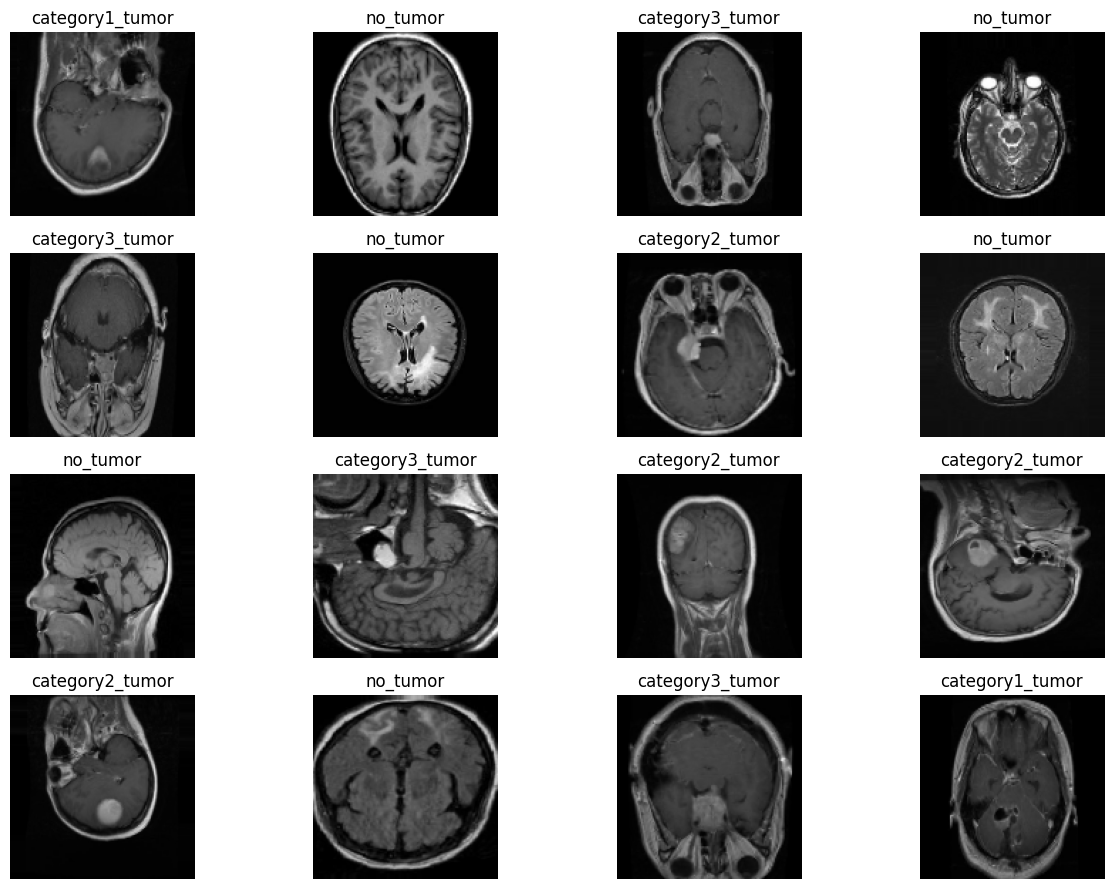

In [ ]:
x,y = next(train_set)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

#Call the plotImages function
plotImages(x,y)

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# IMG_SHAPE = (130,130, 3)
# model=build_model(IMG_SHAPE)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model_history = model.fit(x=train_set,validation_data=valid_set,epochs=30,verbose=1)

Epoch 1/30
122/122 [==============================] - 16s 118ms/step - loss: 1.3783 - accuracy: 0.2817 - val_loss: 1.3366 - val_accuracy: 0.4003
Epoch 2/30
122/122 [==============================] - 11s 88ms/step - loss: 1.3044 - accuracy: 0.3421 - val_loss: 1.2199 - val_accuracy: 0.4451
Epoch 3/30
122/122 [==============================] - 11s 87ms/step - loss: 1.2462 - accuracy: 0.3896 - val_loss: 1.1935 - val_accuracy: 0.4869
Epoch 4/30
122/122 [==============================] - 11s 87ms/step - loss: 1.1734 - accuracy: 0.4628 - val_loss: 1.1205 - val_accuracy: 0.4930
Epoch 5/30
122/122 [==============================] - 11s 87ms/step - loss: 1.1268 - accuracy: 0.4995 - val_loss: 1.0058 - val_accuracy: 0.6012
Epoch 6/30
122/122 [==============================] - 10s 81ms/step - loss: 1.0908 - accuracy: 0.5268 - val_loss: 0.9614 - val_accuracy: 0.6059
Epoch 7/30
122/122 [==============================] - 11s 87ms/step - loss: 1.0644 - accuracy: 0.5304 - val_loss: 0.9661 - val_accuracy

In [ ]:
model.save('first_model_1.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/first_model_1.h5')

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)  # You can customize this if needed

test_set = test_data_gen.flow_from_directory(
    directory="/content/drive/MyDrive/divided_datathon_dataset_pre/test",
    target_size=(64,64),
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

# predictions = model.predict(test_set)
# predicted_classes = predictions.argmax(axis=1)

Found 649 images belonging to 4 classes.


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
y_test = test_set.classes
pred = np.argmax(model.predict_generator(test_set, steps = test_set.n), axis=1)

# # Plot Learning Curves
# plot_learning_curves(history_phase, "Training Phase")

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

<ipython-input-33-8e349b8961d5>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = np.argmax(model.predict_generator(test_set, steps = test_set.n), axis=1)


0.7211093990755008
[[115  38  21  10]
 [ 17 110  32  29]
 [  5   4 164   6]
 [  2   7  10  79]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       184
           1       0.69      0.59      0.63       188
           2       0.72      0.92      0.81       179
           3       0.64      0.81      0.71        98

    accuracy                           0.72       649
   macro avg       0.72      0.73      0.72       649
weighted avg       0.73      0.72      0.72       649



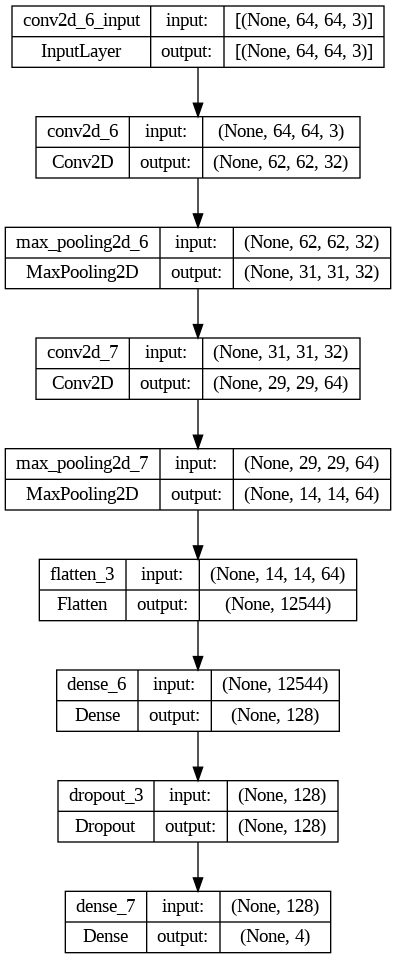

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)